In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#import missingno as msno
import warnings

import math

# Configure Notebook
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_context("notebook")
warnings.filterwarnings('ignore')

In [27]:
df = pd.read_csv("student_data.csv")

print(df.columns.tolist())

['tottr', 'hhmem', 'mode_category', 'duration_min', 'trip_distance_miles', 'arr_time', 'dep_time', 'city_from_zip', 'travel_date', 'gender', 'age', 'citizen', 'driver_license', 'transit_pass', 'car_sharing', 'employment', 'empl_status', 'disabled', 'transit_trip', 'transit_subsidy', 'walk_trips', 'bike_trips', 'student', 'school_grade', 'school_city', 'school_mode', 'education', 'person_trips', 'race', 'workday_range', 'incentive', 'vehicle_count', 'bike_count', 'residence_type', 'home_own', 'income', 'persons_count', 'worker_count', 'student_count', 'license_count', 'trip_count', 'home_city', 'vehicle_op_count', 'home_primarycity', 'WMO_code', 'temperature_2m_max (°C)', 'temperature_2m_min (°C)', 'temperature_2m_mean (°C)', 'apparent_temperature_mean (°C)', 'daylight_dur (s)', 'total_ precip (mm)', 'rain (mm)', 'snowfall (cm)', 'precip_hours (h)', 'model_year', 'body_type', 'fuel_type1', 'purchase_type', 'ownership', 'transmission', 'cylinders', 'veh_type']


In [28]:
# Calculate the percentage of each unique value
value_counts = df['mode_category'].value_counts(normalize=True) * 100
 
# Display the results
print(value_counts)

mode_category
6.0     65.319222
1.0     15.020334
5.0      9.936793
18.0     2.587094
2.0      2.356803
15.0     1.923171
7.0      1.180852
4.0      0.325837
24.0     0.244990
26.0     0.242540
11.0     0.129845
14.0     0.095546
10.0     0.095546
8.0      0.080847
25.0     0.075947
16.0     0.056348
9.0      0.053898
13.0     0.051448
17.0     0.048998
19.0     0.048998
23.0     0.031849
28.0     0.026949
27.0     0.024499
29.0     0.012249
21.0     0.009800
3.0      0.007350
12.0     0.007350
20.0     0.002450
22.0     0.002450
Name: proportion, dtype: float64


In [29]:
def categorize_mode(mode):
    if mode in [1,2, 3, 4]:  # Walk, bike, wheelchair/mobility scooter, other non-motorized
        return 'Active Transportation'
    elif mode in [5,8,10]:  # Auto Driver, motorcycle, rental car
        return 'Auto Driver'
    elif mode in [6,7,9]:  # Auto Passenger, Carpool, taxi
        return 'Auto Passenger'
    elif mode in [15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]:  # Transit modes
        return 'Transit'
    else:  # Everything else
        return 'Other'

In [30]:
# Apply the categorization function to the 'Mode of transport' column
df['mode_category'] = df['mode_category'].astype(int).apply(categorize_mode)

# Calculate the percentage of each mode in the dataset
mode_percentage = df['mode_category'].value_counts(normalize=True) * 100

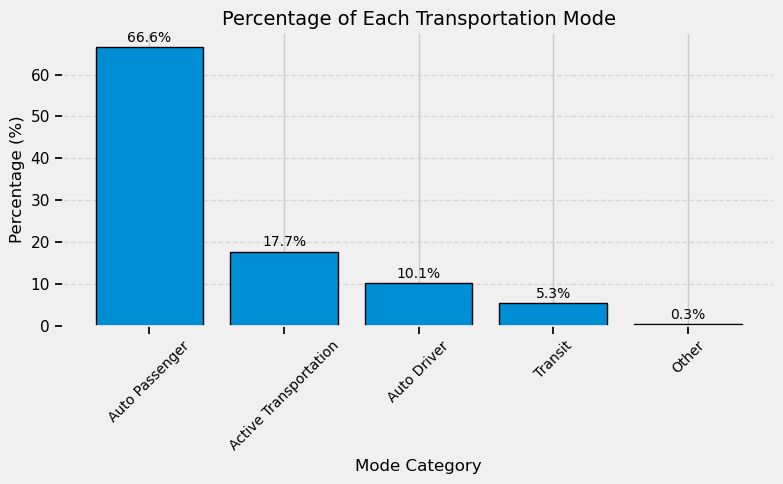

In [31]:
# Plot the percentages as a bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(mode_percentage.index, mode_percentage, edgecolor='black')
 
# Overlay the percentage values on the bars
for bar, percentage in zip(bars, mode_percentage):
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # X-coordinate
        bar.get_height() + 0.5,  # Y-coordinate
        f'{percentage:.1f}%',  # Text to display
        ha='center', va='bottom', fontsize=10, color='black'  # Alignment and style
    )
 
# Add chart details
plt.title('Percentage of Each Transportation Mode', fontsize=14)
plt.xlabel('Mode Category', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [32]:
df['mode_category'].unique()

array(['Auto Passenger', 'Active Transportation', 'Transit',
       'Auto Driver', 'Other'], dtype=object)

In [33]:
df.describe()

,tottr,hhmem,duration_min,trip_distance_miles,gender,age,citizen,driver_license,transit_pass,car_sharing,...,snowfall (cm),precip_hours (h),model_year,body_type,fuel_type1,purchase_type,ownership,transmission,cylinders,veh_type
count,40818.000000,40818.000000,40818.000000,40818.000000,40818.000000,40818.000000,40818.000000,40818.000000,40818.000000,40818.000000,...,40818.000000,40818.000000,40818.000000,40818.000000,40818.000000,40818.000000,40818.000000,40818.000000,40818.00000,40818.000000
mean,2.554020,1.307928,18.169264,7.084744,1.504826,13.736048,1.061860,1.832500,1.947425,1.998555,...,0.018991,1.600936,337.900387,0.575040,0.180754,0.274144,0.185825,0.192464,0.48116,0.350826
std,1.505048,1.316051,29.531349,39.766100,0.499983,10.618453,0.240904,0.373426,0.223186,0.037992,...,0.394568,4.271911,749.642615,1.765642,0.409494,0.633646,0.432569,0.463056,1.26067,0.775892
min,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.000000,6.000000,0.890685,1.000000,8.000000,1.000000,2.000000,2.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,2.000000,1.000000,12.000000,2.240450,2.000000,12.000000,1.000000,2.000000,2.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,3.000000,2.000000,20.000000,5.424998,2.000000,16.000000,1.000000,2.000000,2.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
max,41.000000,6.000000,930.000000,3065.151687,2.000000,99.000000,2.000000,2.000000,2.000000,2.000000,...,16.380000,24.000000,2013.000000,13.000000,5.000000,2.000000,4.000000,3.000000,6.00000,6.000000


# Numeric Features EDA

In [34]:
# check for numeric values 
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()

print("Numeric columns:")
print(numeric_columns)

Numeric columns:
['tottr', 'hhmem', 'duration_min', 'trip_distance_miles', 'gender', 'age', 'citizen', 'driver_license', 'transit_pass', 'car_sharing', 'employment', 'empl_status', 'disabled', 'transit_trip', 'transit_subsidy', 'walk_trips', 'bike_trips', 'student', 'school_grade', 'school_mode', 'education', 'person_trips', 'race', 'incentive', 'vehicle_count', 'bike_count', 'residence_type', 'home_own', 'income', 'persons_count', 'worker_count', 'student_count', 'license_count', 'trip_count', 'vehicle_op_count', 'WMO_code', 'temperature_2m_max (°C)', 'temperature_2m_min (°C)', 'temperature_2m_mean (°C)', 'apparent_temperature_mean (°C)', 'daylight_dur (s)', 'total_ precip (mm)', 'rain (mm)', 'snowfall (cm)', 'precip_hours (h)', 'model_year', 'body_type', 'fuel_type1', 'purchase_type', 'ownership', 'transmission', 'cylinders', 'veh_type']


## General EDA

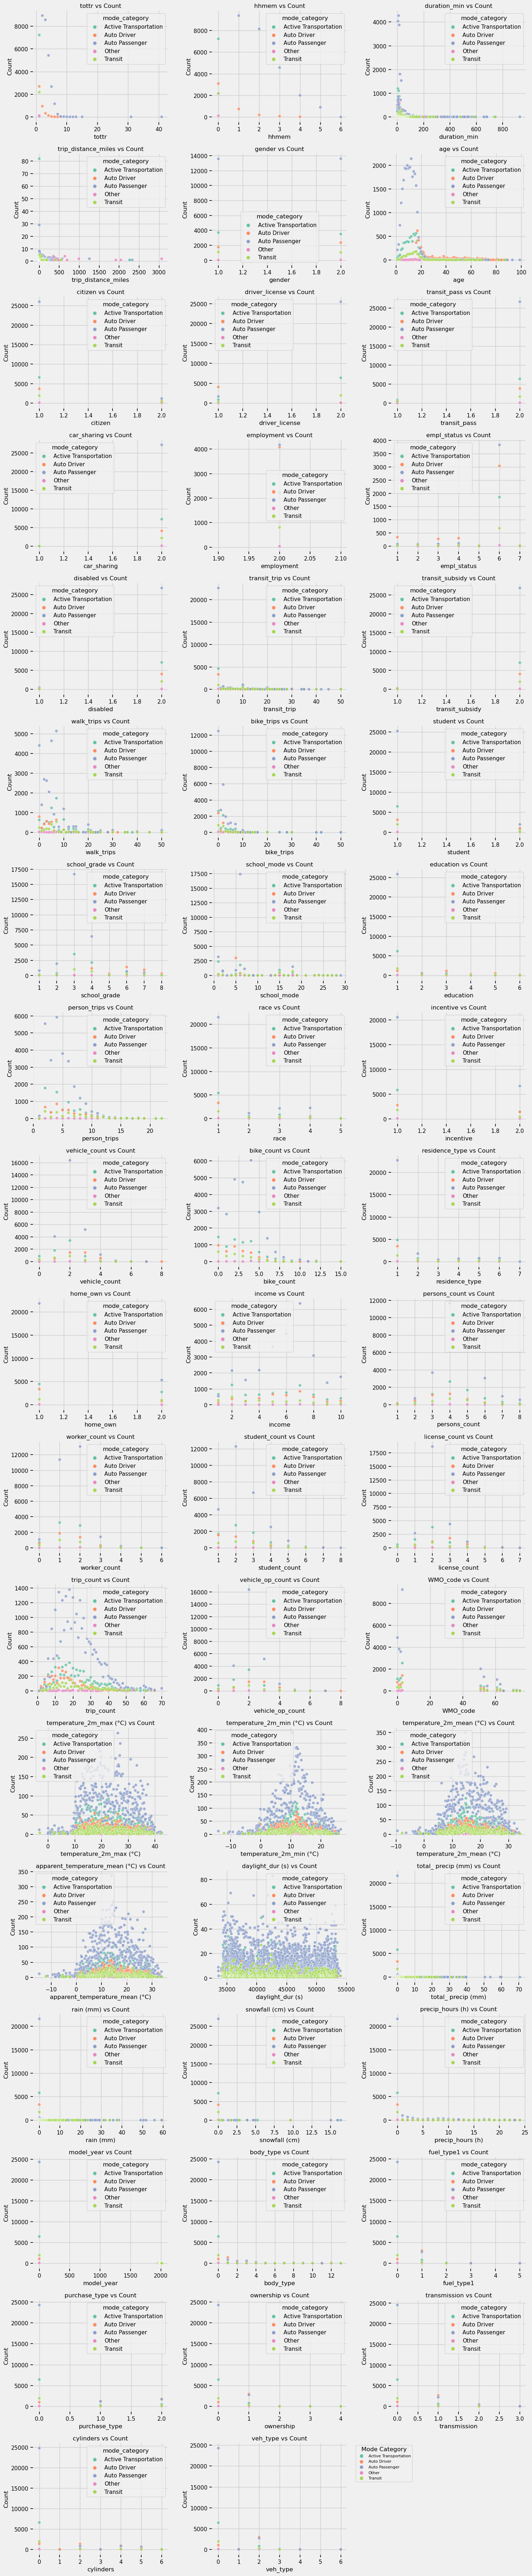

In [35]:
# Filter numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()

# Ensure 'mode_category' matches the specified modes
modes_to_plot = ['Auto Passenger', 'Active Transportation', 'Transit',
       'Auto Driver', 'Other']
df_filtered = df[df['mode_category'].isin(modes_to_plot)]

# Determine grid size
n_cols = 3
n_rows = math.ceil(len(numeric_columns) / n_cols)

# Create the plot grid
plt.figure(figsize=(n_cols * 5, n_rows * 4))

for i, feature in enumerate(numeric_columns):
    plt.subplot(n_rows, n_cols, i + 1)
    
    # Group data by numeric feature and mode to calculate counts
    grouped_data = df_filtered.groupby(['mode_category', feature]).size().reset_index(name='count')
    
    # Scatter plot for the current feature
    sns.scatterplot(
        data=grouped_data,
        x=feature,
        y='count',
        hue='mode_category',
        palette='Set2',
        alpha=0.8
    )
    
    plt.title(f'{feature} vs Count')
    plt.xlabel(feature)
    plt.ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.legend(title='Mode Category', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
plt.show()

## Dropping Redundant Columns

In [ ]:
# employment status has been filtered when seperating students & workers
# veh_op_count overlaps with veh_count
# school mode overlaps with mode_category
df_filtered = df_filtered.drop(columns=['employment', 'empl_status', 'vehicle_op_count', 'school_mode'])

# Categorical Feature EDA

In [40]:
# Select non-numeric columns
non_numeric_columns = df.select_dtypes(exclude=['number']).columns.tolist()

# Print the non-numeric columns
print("Non-numeric columns:")
print(non_numeric_columns)

Non-numeric columns:
['mode_category', 'arr_time', 'dep_time', 'city_from_zip', 'travel_date', 'school_city', 'workday_range', 'home_city', 'home_primarycity']


## Dropping Redundant Columns

In [42]:
# workday_range is for workers
# home_city, home_primarycity, school_city overlap with city_from_zip
df_filtered = df_filtered.drop(columns=['home_primarycity', 'home_city', 'school_city', 'workday_range', 'arr_time'])

In [46]:
# Combine travel_date and dep_time into a single datetime column
df_filtered['departure_datetime'] = pd.to_datetime(df_filtered['travel_date'] + ' ' + df_filtered['dep_time'])

# Drop the original travel_date and dep_time columns if no longer needed
df_filtered = df_filtered.drop(columns=['travel_date', 'dep_time'])

In [47]:
# Create a DataFrame with only non-numeric columns
df_non_numeric = df_filtered[df_filtered.select_dtypes(exclude=['number']).columns.tolist()]

# Display the DataFrame with non-numeric columns
df_non_numeric.head()

,mode_category,city_from_zip,departure_datetime
0,Auto Passenger,Greater Los Angeles Area,2012-05-12 11:10:00
1,Auto Passenger,Greater Los Angeles Area,2012-05-12 11:31:00
2,Auto Passenger,Greater Los Angeles Area,2012-05-12 11:52:00
3,Auto Passenger,Greater Los Angeles Area,2012-05-12 15:30:00
4,Auto Passenger,Greater Los Angeles Area,2012-05-12 08:15:00


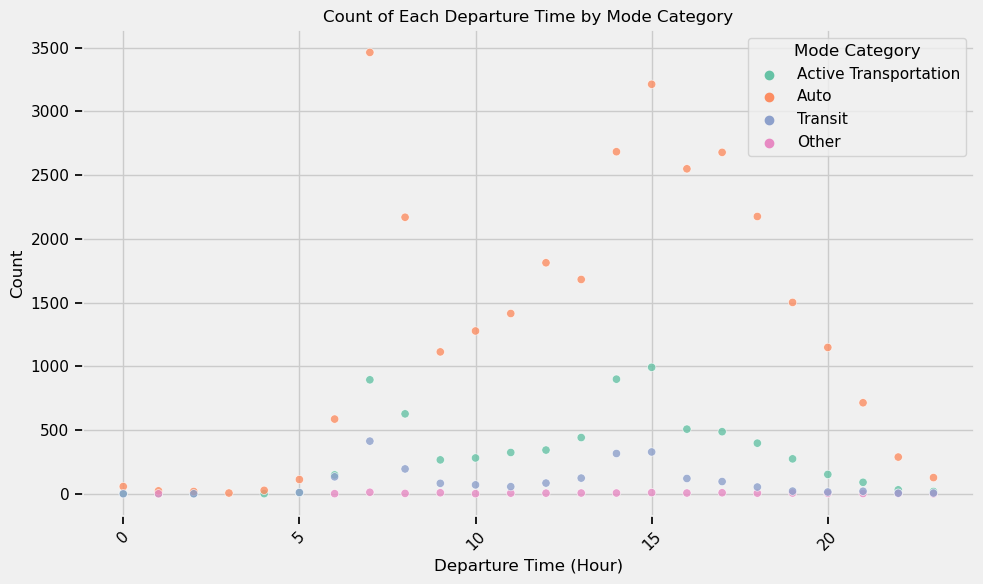

In [ ]:
# Convert 'dep_time' to datetime format
df['dep_time'] = pd.to_datetime(df['dep_time'], errors='coerce')

# Filter out rows where 'dep_time' could not be converted (NaT values)
df_filtered = df.dropna(subset=['dep_time'])

# Group by 'dep_time' and 'mode_category' to get the counts
grouped_data = df_filtered.groupby([df['dep_time'].dt.hour, 'mode_category']).size().reset_index(name='count')

# Plotting the count of each departure time, color-coded by mode category
plt.figure(figsize=(10, 6))
sns.scatterplot(data=grouped_data, x='dep_time', y='count', hue='mode_category', palette='Set2', alpha=0.8)

# Customize the plot
plt.title('Count of Each Departure Time by Mode Category')
plt.xlabel('Departure Time (Hour)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Mode Category')
plt.tight_layout()

plt.show()

## Handling Missing Values
Most of the missing values have already been dealth with before splitting the dataset into students & workers. Here we are just double checking.

In [53]:
# Check for null values in numeric columns
null_counts = df_filtered.isnull().sum()

# Print columns with null values
print("Numeric columns with null or NaN values:")
print(null_counts[null_counts > 0])

Numeric columns with null or NaN values:
Series([], dtype: int64)


# Geospatial Features EDA

In [ ]:
df_non_numeric.head()

,hh_person_id,arr_time,dep_time,city_from_zip,mode_category,travel_date,school_city,school_zipcode,workday_range,home_city,home_primarycity
0,1032036_3,11:30:00,11:10:00,Greater Los Angeles Area,Auto,2012-05-12,SAN DIEGO,92127.0,"[nan, nan, nan, nan, nan, nan, nan]",SAN DIEGO,SAN DIEGO
1,1032036_3,11:45:00,11:31:00,Greater Los Angeles Area,Auto,2012-05-12,SAN DIEGO,92127.0,"[nan, nan, nan, nan, nan, nan, nan]",SAN DIEGO,SAN DIEGO
2,1032036_3,12:00:00,11:52:00,Greater Los Angeles Area,Auto,2012-05-12,SAN DIEGO,92127.0,"[nan, nan, nan, nan, nan, nan, nan]",SAN DIEGO,SAN DIEGO
3,1032036_3,15:50:00,15:30:00,Greater Los Angeles Area,Auto,2012-05-12,SAN DIEGO,92127.0,"[nan, nan, nan, nan, nan, nan, nan]",SAN DIEGO,SAN DIEGO
4,1032036_4,08:35:00,08:15:00,Greater Los Angeles Area,Auto,2012-05-12,SAN DIEGO,92127.0,"[nan, nan, nan, nan, nan, nan, nan]",SAN DIEGO,SAN DIEGO


In [ ]:
# overlap with city_from_zip column
df_non_numeric = df_non_numeric.drop(columns=['home_city'])

In [ ]:
df_non_numeric['city_from_zip'].unique()

array(['Greater Los Angeles Area', 'Sacramento Area',
       'San Francisco Bay Area', 'Stockton Area', 'San Diego County',
       'Riverside-San Bernardino', 'Fresno Area', 'Bakersfield Area'],
      dtype=object)

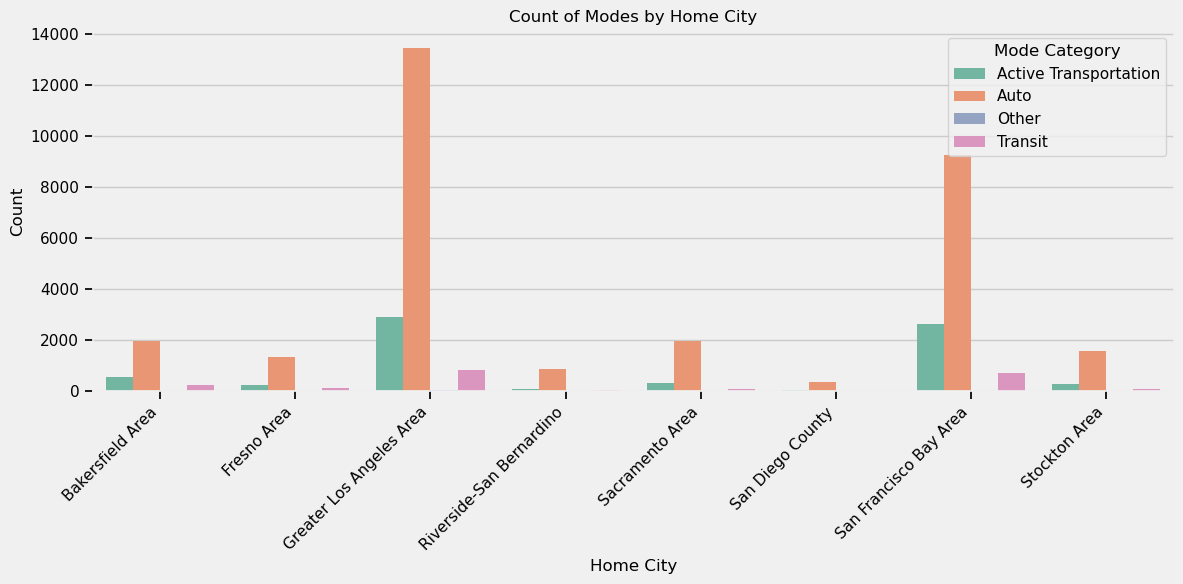

In [ ]:

# Group by 'home_city' and 'mode_category' to get counts
home_city_mode_counts = df_filtered.groupby(['city_from_zip', 'mode_category']).size().reset_index(name='count')

# Create the plot
plt.figure(figsize=(12, 6))
sns.barplot(data=home_city_mode_counts, x='city_from_zip', y='count', hue='mode_category', palette='Set2')

# Customize the plot
plt.title('Count of Modes by Home City')
plt.xlabel('Home City')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Mode Category')
plt.tight_layout()

plt.show()

In [61]:
import folium
from folium import Circle
from folium.plugins import HeatMap

In [83]:
# Calculate mode counts by city_from_zip
mode_counts = df_filtered.groupby(['city_from_zip', 'mode_category']).size().reset_index(name='count')

# Coordinates for the centers of the mentioned areas (approximations)
area_centers = {
    'Greater Los Angeles Area': (34.0522, -118.2437),
    'Sacramento Area': (38.5816, -121.4944),
    'San Francisco Bay Area': (37.7749, -122.4194),
    'Stockton Area': (37.9577, -121.2908),
    'San Diego County': (32.7157, -117.1611),
    'Riverside-San Bernardino': (34.0522, -117.2437),
    'Fresno Area': (36.7378, -119.7871),
    'Bakersfield Area': (35.3733, -119.0187),
}

# Create the map centered around California
map_center = (36.7783, -119.4179)
m = folium.Map(location=map_center, zoom_start=6)

# Add markers for each area, color-coded by mode category
for area, coords in area_centers.items():
    area_modes = mode_counts[mode_counts['city_from_zip'] == area]
    
    # For simplicity, we are color-coding by mode_category, you can modify this based on the logic you want
    for _, row in area_modes.iterrows():
        mode = row['mode_category']
        count = row['count']
        
        # Set color based on the mode (you can customize the colors)
        mode_colors = {
            'Auto Driver': 'blue',
            'Auto Passenger': 'gray',
            'Transit': 'green',
            'Active Transportation': 'orange',
            'Other': 'red'
        }
        
        # Add a circle marker with color based on the mode
        folium.CircleMarker(
            location=coords,
            radius=count / 150,  # Adjust size based on count (you can modify this factor)
            color=mode_colors.get(mode, 'black'),
            fill=True,
            fill_color=mode_colors.get(mode, 'black'),
            fill_opacity=0.3,
            popup=f'{area}: {mode} ({count})'
        ).add_to(m)

# Add a legend to the map
legend_html = '''
<div style="
    position: fixed;
    bottom: 50px;
    left: 50px;
    width: 250px;
    height: 150px;
    background-color: white;
    border:2px solid grey;
    z-index:9999;
    font-size:14px;
    padding: 10px;
">
    <b>Mode Categories:</b><br>
    <i style="background:blue; color: white; padding: 5px 10px;">&nbsp;</i> Auto Driver<br>
    <i style="background:gray; color: white; padding: 5px 10px;">&nbsp;</i> Auto Passenger<br>
    <i style="background:green; color: white; padding: 5px 10px;">&nbsp;</i> Transit<br>
    <i style="background:orange; color: white; padding: 5px 10px;">&nbsp;</i> Active Transportation<br>
    <i style="background:red; color: white; padding: 5px 10px;">&nbsp;</i> Other<br>
</div>
'''
m.get_root().html.add_child(folium.Element(legend_html))

# Display the map
m

In [85]:
# Calculate mode counts by city_from_zip
mode_counts = df_filtered.groupby(['city_from_zip', 'mode_category']).size().reset_index(name='count')

# Coordinates for the centers of the mentioned areas (approximations)
area_centers = {
    'Greater Los Angeles Area': (34.0522, -118.2437),
    'Sacramento Area': (38.5816, -121.4944),
    'San Francisco Bay Area': (37.7749, -122.4194),
    'Stockton Area': (37.9577, -121.2908),
    'San Diego County': (32.7157, -117.1611),
    'Riverside-San Bernardino': (34.0522, -117.2437),
    'Fresno Area': (36.7378, -119.7871),
    'Bakersfield Area': (35.3733, -119.0187),
}

# Mode color dictionary for heatmap
mode_colors = {
            'Auto Driver': 'blue',
            'Auto Passenger': 'gray',
            'Transit': 'green',
            'Active Transportation': 'orange',
            'Other': 'red'
}

# Function to generate a heatmap for a specific mode
def create_heatmap_for_mode(mode):
    # Filter the mode data
    mode_data = mode_counts[mode_counts['mode_category'] == mode]
    
    # Create a map centered around California
    map_center = (36.7783, -119.4179)
    m = folium.Map(location=map_center, zoom_start=6)
    
    # Prepare data for the heatmap (latitude, longitude, intensity)
    heat_data = []
    for _, row in mode_data.iterrows():
        city = row['city_from_zip']
        count = row['count']
        coords = area_centers[city]
        
        # Add the data point (latitude, longitude, intensity)
        heat_data.append([coords[0], coords[1], count])
    
    # Add heatmap layer for this mode
    HeatMap(heat_data, min_opacity=0.3, max_val=max(mode_counts['count']), radius=25, blur=5, gradient={0: 'gray', 0.5: mode_colors[mode], 1: mode_colors[mode]}).add_to(m)
    # just print it for now 
    # Save the map to an HTML file just print it for now 
    #m.save(f"heatmap_{mode}.html")
    return m

# Generate separate maps for each mode
for mode in mode_colors.keys():
    print(mode)
    create_heatmap_for_mode(mode)



Auto Driver
Auto Passenger
Transit
Active Transportation
Other


You can try heatmaps for different modes here:

In [96]:
# create_heatmap_for_mode('Active Transportation')
create_heatmap_for_mode('Auto Driver')
# create_heatmap_for_mode('Transit')
# create_heatmap_for_mode('Auto Passenger')
# create_heatmap_for_mode('Other')

In [52]:
df_filtered.to_csv('students_df_cleaned.csv')